In [3]:
from utils import Sample
import numpy as np
import pandas as pd

In [4]:
s = Sample("/Users/simongutwein/ccriod/OneDrive - CCRI/Github/Data/20211227_14-3450_BM")

In [5]:
imc = {
    n: list(i.ravel()) for (n,i) in zip(s.rois[0].imc_marker, s.rois[0].imc_imgs)
}

In [6]:
df = pd.DataFrame(imc)
df.head()

,Myelope_276((3722))Y89,CD44_69((3727))In115,131Xe,134Xe,136Ba,Fibrone_328((3730))La139,CD11b_2279((3733))Nd142,HLA-DR_1849((3622))Nd143,PRPH_3070((3723))Nd144,"CXCR2,I_3112((3731))Nd145",...,CD4_2331((3718))Yb171,Indolea_2281((3681))Yb172,Granzym_2397((3682))Yb173,ELAVL4_3063((3637))Yb174,CD14_2962((3685))Lu175,cleaved_198((3674))Yb176,Iridium_1033((1253))Ir191,Iridium_1033((1254))Ir193,Vimenti_655((3728))Pt196,CD15_627((3644))Bi209
0,0.0,0.0,13.999260,7.414323,7.839692,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,3.528024,0.0,0.0,0.0,0.000000,0.0,0.000000
1,0.0,0.0,25.520580,11.002234,8.206296,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000
2,0.0,0.0,28.431223,6.000000,6.567459,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.042669
3,0.0,0.0,39.669449,9.363338,9.232917,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,1.000000
4,1.0,0.0,22.103079,13.666492,5.085303,1.0,0.0,2.648374,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,2.187001,0.0,19.390738


In [7]:
corr = df.corr()

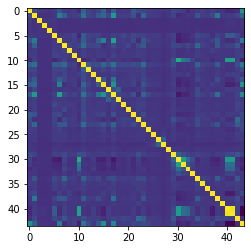

In [9]:
import matplotlib.pyplot as plt

plt.imshow(corr)

In [8]:
print(corr)

                           Myelope_276((3722))Y89  CD44_69((3727))In115  \
Myelope_276((3722))Y89                   1.000000              0.110848   
CD44_69((3727))In115                     0.110848              1.000000   
131Xe                                    0.036552              0.008539   
134Xe                                    0.023273              0.007797   
136Ba                                    0.020615              0.008320   
Fibrone_328((3730))La139                 0.038748              0.030370   
CD11b_2279((3733))Nd142                  0.139384              0.328398   
HLA-DR_1849((3622))Nd143                 0.032413              0.200663   
PRPH_3070((3723))Nd144                   0.029405              0.044004   
CXCR2,I_3112((3731))Nd145                0.037282              0.054692   
Histone_1978((3831))Nd146               -0.021730              0.066152   
HLA-ABC_127((3623))Sm147                 0.208006              0.272749   
CD20_2963((3679))Nd148   

In [1]:
import pandas as pd

data = {'A': [45, 37, 42, 35, 39],
        'B': [38, 31, 26, 28, 33],
        'C': [10, 15, 17, 21, 12]
        }


df = pd.DataFrame(data, columns=['A', 'B', 'C'])
print(df.head())
corrMatrix = df.corr()
print(corrMatrix)


    A   B   C
0  45  38  10
1  37  31  15
2  42  26  17
3  35  28  21
4  39  33  12
          A         B         C
A  1.000000  0.518457 -0.701886
B  0.518457  1.000000 -0.860941
C -0.701886 -0.860941  1.000000


In [ ]:
class Mapping:
    def __init__(self, iterable):
        self.items_list = []
        self.__update(iterable)

    def update(self, iterable):
        for item in iterable:
            self.items_list.append(item)

    __update = update   # private copy of original update() method


class MappingSubclass(Mapping):

    def update(self, keys, values):
        # provides new signature for update()
        # but does not break __init__()
        for item in zip(keys, values):
            self.items_list.append(item)


In [1]:
from utils import Sample, additive_blend

In [2]:
sample = "/Users/simongutwein/ccriod/OneDrive - CCRI/Github/Data/20211214_18-2600_BM"
rois = Sample(sample)

/Users/simongutwein/Documents/GitHub/workflow/utils.py:88: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.if_imgs = np.array([cv2.cvtColor(cv2.imread(df[x]), cv2.COLOR_BGR2GRAY) for x in ["if_b", "if_g", "if_r"]])


In [3]:
roi = rois.rois[0]

In [4]:
import preprocessing.preprocess as pp

In [5]:
pp_if = pp.preprocess(roi.if_nuc)
pp_imc = pp.preprocess(roi.imc_nuc)

0 hot pixels found.
0 hot pixels found.


In [7]:
import registration.register as reg

In [8]:
h = reg.find_matches(pp_if, pp_imc)
transformed = reg.transform(pp_if, pp_imc, h)

Found 559 matches.


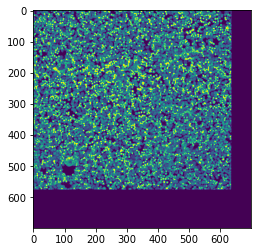

In [10]:
import matplotlib.pyplot as plt
plt.imshow(transformed)